GeoJson Data Approach

In [5]:
import osmnx as ox
import geojson
import pandas as pd

def get_place_postal_code_polygons(place_name):
    # Get postal code polygons for the specified place using OSMnx
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})

    # Convert the GeoDataFrame to a Pandas DataFrame
    df = pd.DataFrame(postal_code_polygons)

    # Drop rows with NaN values in the 'postal_code' or 'geometry' columns
    df = df.dropna(subset=['postal_code', 'geometry'])

    # Dictionary to store postal code areas and their polygons
    postal_code_polygon_dict = {}

    # Iterate over the features in the cleaned DataFrame
    for idx, feature in df.iterrows():
        # Extract postal code and polygon
        postal_code = feature['postal_code']
        postal_code_polygon = feature['geometry']

        # Add the postal code and polygon to the dictionary
        postal_code_polygon_dict[postal_code] = postal_code_polygon

    return postal_code_polygon_dict


# Example call for Kassel
kassel_postal_code_polygons = get_place_postal_code_polygons("Kassel")

# Example call for Germany
#ger_postal_code_polygons = get_place_postal_code_polygons("Germany")

# Print the resulting dictionary for testing purposes
print("Kassel Postal Code Polygons:", kassel_postal_code_polygons)

#print("Germany Postal Code Polygons:", ger_postal_code_polygons)

# Function to format data into GeoJSON
def format_geojson_data(data):
    geojson_features = []
    for postal_code, polygon in data.items():
        feature = geojson.Feature(geometry=polygon, properties={"postal_code": postal_code})
        geojson_features.append(feature)

    geojson_feature_collection = geojson.FeatureCollection(geojson_features)
    return geojson_feature_collection


# Convert Kassel postal code data to GeoJSON format
kassel_geojson_data = format_geojson_data(kassel_postal_code_polygons)

# Convert Germany postal code data to GeoJSON format
#ger_geojson_data = format_geojson_data(ger_postal_code_polygons)

# Print the resulting GeoJSON data for testing purposes
# print("Kassel GeoJSON Data:")
# print(geojson.dumps(kassel_geojson_data, indent=2))

# Print the resulting GeoJSON data for testing purposes
#print("Germany GeoJSON Data:")
#print(geojson.dumps(ger_geojson_data, indent=2))

Kassel Postal Code Polygons: {'34123': <POLYGON ((9.489 51.292, 9.489 51.293, 9.489 51.293, 9.49 51.294, 9.49 51.29...>, '34121': <POLYGON ((9.449 51.313, 9.45 51.313, 9.478 51.312, 9.478 51.312, 9.479 51.3...>, '34233': <POLYGON ((9.485 51.378, 9.485 51.378, 9.486 51.378, 9.486 51.378, 9.486 51....>, '34125': <POLYGON ((9.503 51.321, 9.504 51.321, 9.504 51.321, 9.506 51.321, 9.507 51....>, '34128': <POLYGON ((9.369 51.349, 9.37 51.349, 9.37 51.35, 9.371 51.35, 9.371 51.35, ...>, '34131': <POLYGON ((9.351 51.307, 9.352 51.307, 9.352 51.308, 9.353 51.308, 9.354 51....>, '34132': <POLYGON ((9.362 51.293, 9.362 51.293, 9.363 51.293, 9.363 51.294, 9.364 51....>, '34119': <POLYGON ((9.446 51.315, 9.446 51.317, 9.447 51.317, 9.448 51.318, 9.449 51....>, '34130': <POLYGON ((9.409 51.326, 9.41 51.328, 9.412 51.328, 9.414 51.328, 9.42 51.32...>, '34134': <POLYGON ((9.43 51.3, 9.431 51.301, 9.433 51.301, 9.434 51.301, 9.442 51.302...>, '34117': <POLYGON ((9.476 51.321, 9.478 51.321, 9.48 51.321,

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


GeoJson Data File Kassel


In [6]:
import json

# Function to save GeoJSON data to a file
def save_geojson_to_file(geojson_data, file_path):
    with open(file_path, 'w') as file:
        json.dump(geojson_data, file, indent=2)

# Save Kassel GeoJSON data to a file
kassel_geojson_file_path = 'kassel_geojson_data.geojson'
save_geojson_to_file(kassel_geojson_data, kassel_geojson_file_path)

print(f"Kassel GeoJSON data saved to {kassel_geojson_file_path}")

Kassel GeoJSON data saved to kassel_geojson_data.geojson


GeoJson Data File Germany

In [3]:
# import json

# # Function to save GeoJSON data to a file
# def save_geojson_to_file(geojson_data, file_path):
#     with open(file_path, 'w') as file:
#         json.dump(geojson_data, file, indent=2)

# # Save Germany GeoJSON data to a file
# ger_geojson_file_path = 'germany_geojson_data.geojson'
# save_geojson_to_file(ger_geojson_data, ger_geojson_file_path)

# print(f"Germany GeoJSON data saved to {ger_geojson_file_path}")

Visualization Data

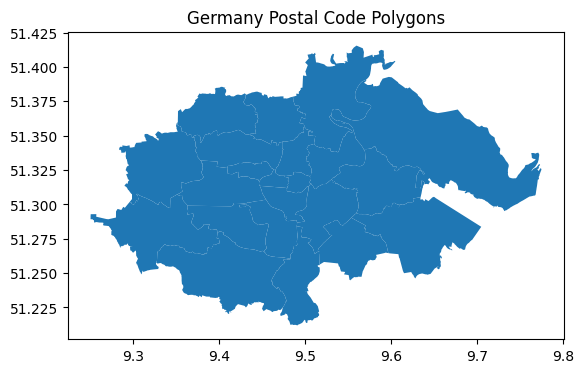

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON data using geopandas
ger_gdf = gpd.read_file(kassel_geojson_file_path)

# Plot the GeoDataFrame
ger_gdf.plot()
plt.title('Germany Postal Code Polygons')
plt.show()
